In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from neuralforecast.core import NeuralForecast
from neuralforecast.models import NHITS, NBEATS, PatchTST

from neuralforecast.losses.pytorch import MAE
from neuralforecast.losses.numpy import mae, mse

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('data/daily_min_temp.csv')
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [3]:
# Need to add a unique id
df['unique_id'] = 0

# rename cols
df = df.rename(columns={'Date' : 'ds', 'Temp':'y'})

df = df[['unique_id', 'ds', 'y']]

df.head()

,unique_id,ds,y
0,0,1981-01-01,20.7
1,0,1981-01-02,17.9
2,0,1981-01-03,18.8
3,0,1981-01-04,14.6
4,0,1981-01-05,15.8


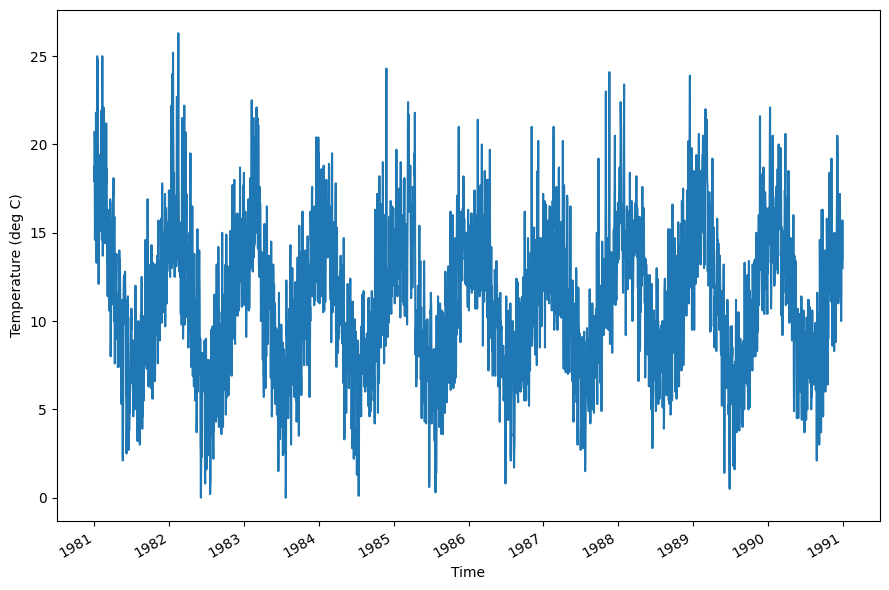

In [4]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(df['ds'], df['y'])
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (deg C)')

fig.autofmt_xdate()
plt.tight_layout()

## Modeling 

In [5]:
# In this architecture neeed to set validation and test size
val_size = 365
test_size = 365

horizon = 365

# List models to test
models = [NHITS(h=horizon, input_size=2*horizon, max_steps=30),
          NBEATS(h=horizon, input_size=2*horizon, max_steps=30),
          PatchTST(h=horizon, input_size=2*horizon, max_steps=30)]

Seed set to 1
Seed set to 1
Seed set to 1


In [6]:
# initialise objetc
nf = NeuralForecast(models=models, freq='D')

In [7]:
preds_df = nf.cross_validation(df=df, val_size=val_size, test_size=test_size, n_windows=None)

2024-04-10 17:58:43.264460: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

In [8]:
# Take a look
preds_df.head()

,ds,cutoff,NHITS,NBEATS,PatchTST,y
unique_id,,,,,,
0,1990-01-01,1989-12-31,12.181457,13.451404,14.245150,14.8
0,1990-01-02,1989-12-31,12.254253,12.734602,15.549509,13.3
0,1990-01-03,1989-12-31,12.061666,11.949769,13.847411,15.6
0,1990-01-04,1989-12-31,12.426597,10.299377,14.415501,14.5
0,1990-01-05,1989-12-31,12.921947,13.453600,14.923653,14.3


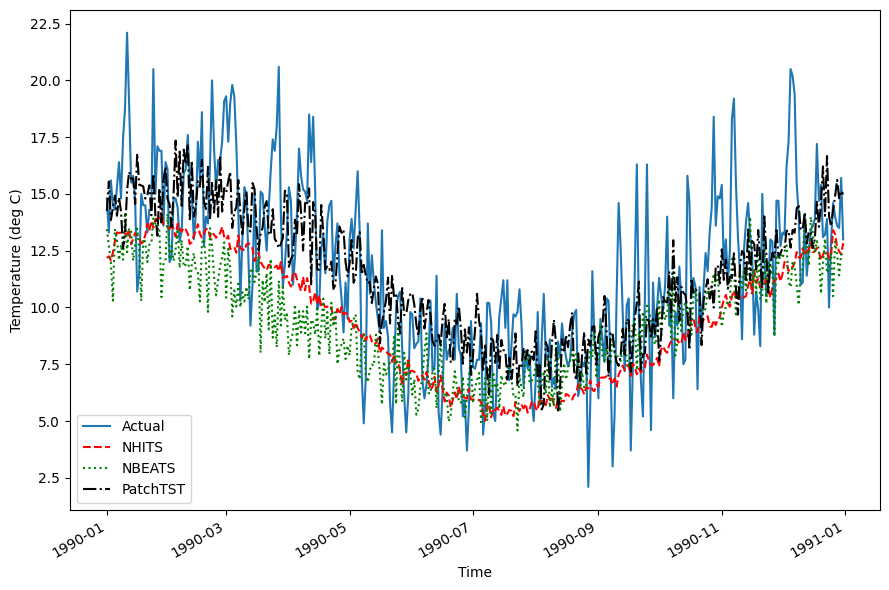

In [9]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(preds_df['ds'], preds_df['y'], label='Actual')
ax.plot(preds_df['ds'], preds_df['NHITS'], label='NHITS', ls='--', color='red')
ax.plot(preds_df['ds'], preds_df['NBEATS'], label='NBEATS', ls=':', color='green')
ax.plot(preds_df['ds'], preds_df['PatchTST'], label='PatchTST', ls='-.', color='black')

ax.legend(loc='best')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (deg C)')

fig.autofmt_xdate()
plt.tight_layout()

In [10]:
data = {'N-HiTS': [mae(preds_df['NHITS'], preds_df['y']), mse(preds_df['NHITS'], preds_df['y'])],
       'N-BEATS': [mae(preds_df['NBEATS'], preds_df['y']), mse(preds_df['NBEATS'], preds_df['y'])],
       'PatchTST': [mae(preds_df['PatchTST'], preds_df['y']), mse(preds_df['PatchTST'], preds_df['y'])]}

metrics_df = pd.DataFrame(data=data)
metrics_df.index = ['mae', 'mse']

metrics_df.style.highlight_min(color='lightgreen', axis=1)

,N-HiTS,N-BEATS,PatchTST
mae,2.667125,2.913790,2.146153
mse,10.900980,13.640572,7.500168
